<a href="https://colab.research.google.com/github/dperkins3pi/SignLanguageTransformers/blob/main/SignEaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
val = pd.read_csv('/content/val.csv')

In [ ]:
test.head()

,Participant ID,Video file,Gloss,ASL-LEX Code
0,P42,8336197103293617-CHAMP.mp4,CHAMP,J_03_030
1,P42,7974224982720846-NOT MIND.mp4,NOTMIND,G_01_060
2,P42,6425246898229175-SPECIAL.mp4,SPECIAL1,J_02_020
3,P42,6224825679560193-HE.mp4,HE,F_02_044
4,P42,521104571152148-ABSOLUTELY NOTHING.mp4,ABSOLUTELYNOTHING,J_01_027


In [ ]:
train.head()

,Participant ID,Video file,Gloss,ASL-LEX Code
0,P1,15890366051589533-APPLE.mp4,APPLE,A_03_054
1,P1,35618482303951104-IMPOSSIBLE.mp4,IMPOSSIBLE,B_01_032
2,P1,6958143575951994-PARK.mp4,PARK,E_03_028
3,P1,8006032738002744-SOCCER 2.mp4,SOCCER2,F_03_032
4,P1,37542279833186454-STINK.mp4,STINK,H_01_064


In [ ]:
val.head()

,Participant ID,Video file,Gloss,ASL-LEX Code
0,P5,1512781787144335-SAIL.mp4,SAIL1,D_01_074
1,P5,5848396359751864-EQUAL.mp4,EQUAL,C_01_052
2,P5,17988264683482313-PLIERS.mp4,PLIERS,D_01_032
3,P5,5864967388246956-DIVE.mp4,DIVE,D_02_029
4,P5,7916865724879083-BROWN.mp4,BROWN,D_03_045


In [ ]:
full = pd.concat([test, train, val])
full.head()

,Participant ID,Video file,Gloss,ASL-LEX Code
0,P42,8336197103293617-CHAMP.mp4,CHAMP,J_03_030
1,P42,7974224982720846-NOT MIND.mp4,NOTMIND,G_01_060
2,P42,6425246898229175-SPECIAL.mp4,SPECIAL1,J_02_020
3,P42,6224825679560193-HE.mp4,HE,F_02_044
4,P42,521104571152148-ABSOLUTELY NOTHING.mp4,ABSOLUTELYNOTHING,J_01_027


In [ ]:
demographics = pd.read_csv('/content/demographics.csv')
demographics.head()

,id,gender,age,identity,ASL level,ASL start age,region
0,P1,Female,20-29,HOH,3,19,West
1,P2,Female,30-39,DEAF,5,2,Northeast
2,P3,Female,20-29,DEAF,5,18,South
3,P4,Female,60-69,DEAF,5,18,Northeast
4,P5,Female,30-39,DEAF,6,20,Midwest


In [ ]:
print(len(train['Gloss'].unique()))
print(len(full['Gloss'].unique()))

2731
2731


2731 unique words

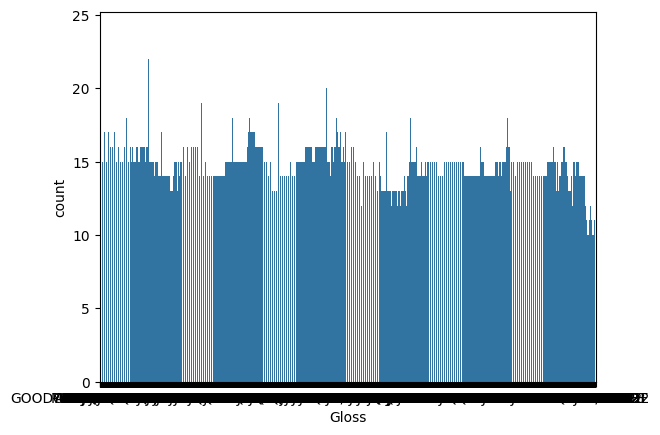

In [ ]:
sns.countplot(data=train, x='Gloss')
plt.show()

The above is near uninterprable, instead we look at distribution of occurences for the train data set

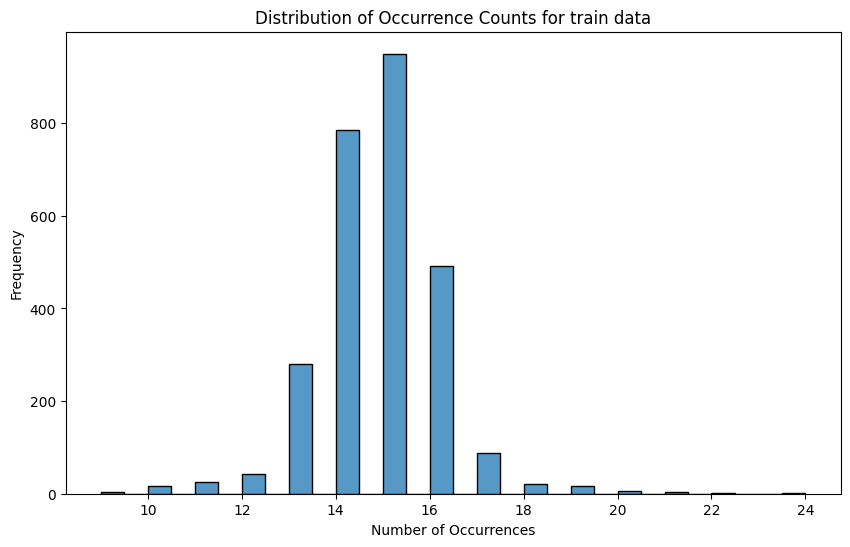

In [ ]:
counts = train['Gloss'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(counts, bins=30, kde=False)
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Occurrence Counts for train data')
plt.show()

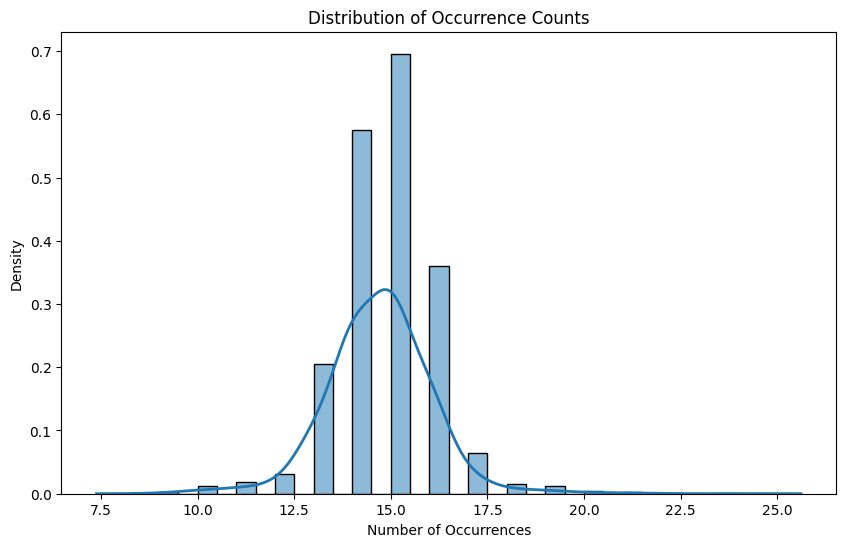

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(counts, bins=30, stat='density', alpha=0.5, kde=False)
sns.kdeplot(counts, fill=False, linewidth=2, bw_adjust=2)
plt.xlabel('Number of Occurrences')
plt.ylabel('Density')
plt.title('Distribution of Occurrence Counts')
plt.show()

In [ ]:
print("Summary Statistics of Occurrence Counts:")
print(f"Min occurrences: {counts.min()}")
print(f"Max occurrences: {counts.max()}")
print(f"Mean occurrences: {counts.mean():.2f}")
print(f"Median occurrences: {counts.median()}")
print(f"Std Dev: {counts.std():.2f}")
print(f"Total unique values: {len(counts)}")
print(f"Total data points: {counts.sum()}")

Summary Statistics of Occurrence Counts:
Min occurrences: 9
Max occurrences: 24
Mean occurrences: 14.70
Median occurrences: 15.0
Std Dev: 1.31
Total unique values: 2731
Total data points: 40154


In [ ]:
anti_mode = counts.idxmin()
anti_mode_count = counts.min()
mode = counts.idxmax()
mode_count = counts.max()

print(f"Least common word: '{anti_mode}'")
print(f"Appears: {anti_mode_count} times")

print(f"Most common word: '{mode}'")
print(f"Appears: {mode_count} times")

Least common word: 'BEE2'
Appears: 9 times
Most common word: 'DOG1'
Appears: 24 times


Validation data set statistics

In [ ]:
counts2 = val['Gloss'].value_counts()

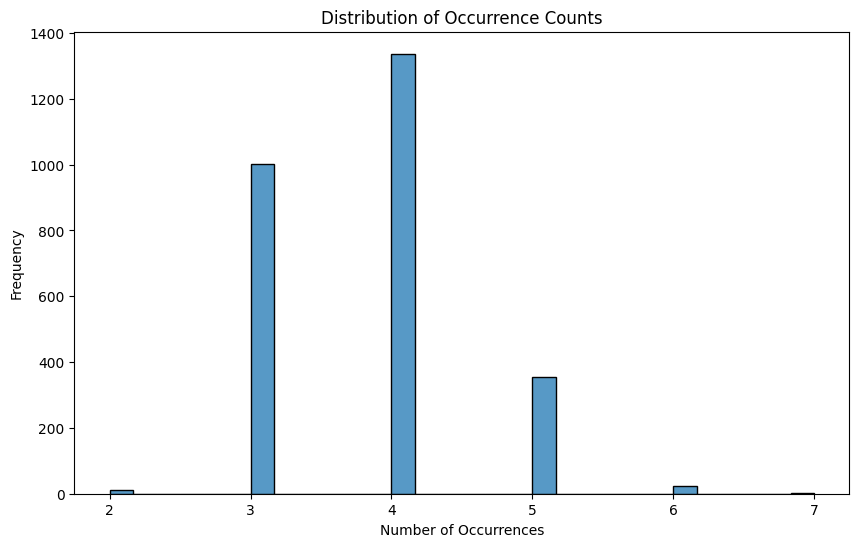

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(counts2, bins=30, kde=False)
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Occurrence Counts')
plt.show()

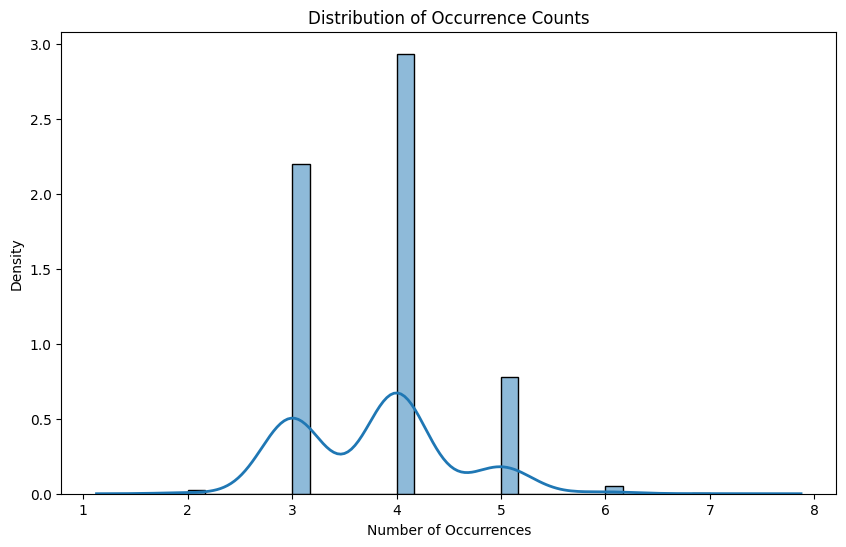

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(counts2, bins=30, stat='density', alpha=0.5, kde=False)
sns.kdeplot(counts2, fill=False, linewidth=2, bw_adjust=2)
plt.xlabel('Number of Occurrences')
plt.ylabel('Density')
plt.title('Distribution of Occurrence Counts')
plt.show()

In [ ]:
print("Summary Statistics of Occurrence Counts:")
print(f"Min occurrences: {counts2.min()}")
print(f"Max occurrences: {counts2.max()}")
print(f"Mean occurrences: {counts2.mean():.2f}")
print(f"Median occurrences: {counts2.median()}")
print(f"Std Dev: {counts2.std():.2f}")
print(f"Total unique values: {len(counts2)}")
print(f"Total data points: {counts2.sum()}")

Summary Statistics of Occurrence Counts:
Min occurrences: 2
Max occurrences: 7
Mean occurrences: 3.77
Median occurrences: 4.0
Std Dev: 0.71
Total unique values: 2731
Total data points: 10304


In [ ]:
anti_mode = counts2.idxmin()
anti_mode_count = counts2.min()
mode = counts2.idxmax()
mode_count = counts2.max()

print(f"Least common word: '{anti_mode}'")
print(f"Appears: {anti_mode_count} times")

print(f"Most common word: '{mode}'")
print(f"Appears: {mode_count} times")

Least common word: 'UNDERWEAR1'
Appears: 2 times
Most common word: 'ABOUT1'
Appears: 7 times


Train data set summary statistics

In [ ]:
counts3 = test['Gloss'].value_counts()

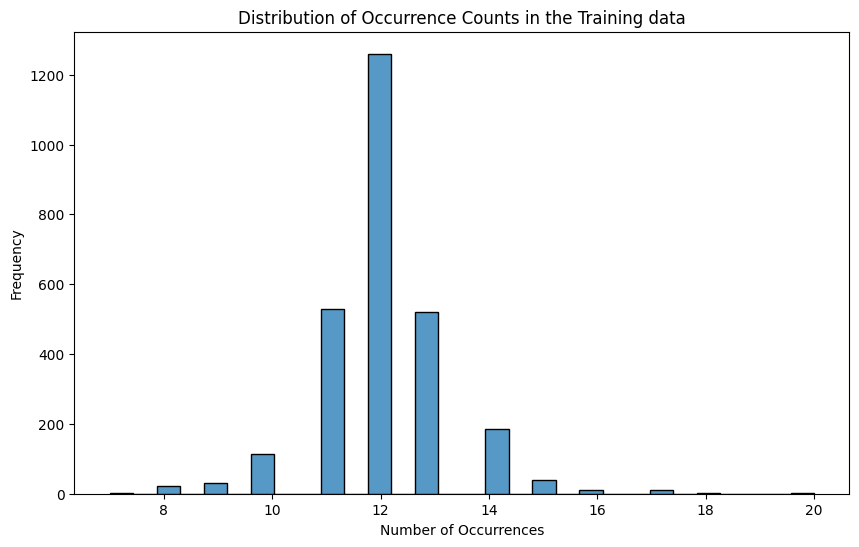

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(counts3, bins=30, kde=False)
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Occurrence Counts in the Training data')
plt.show()

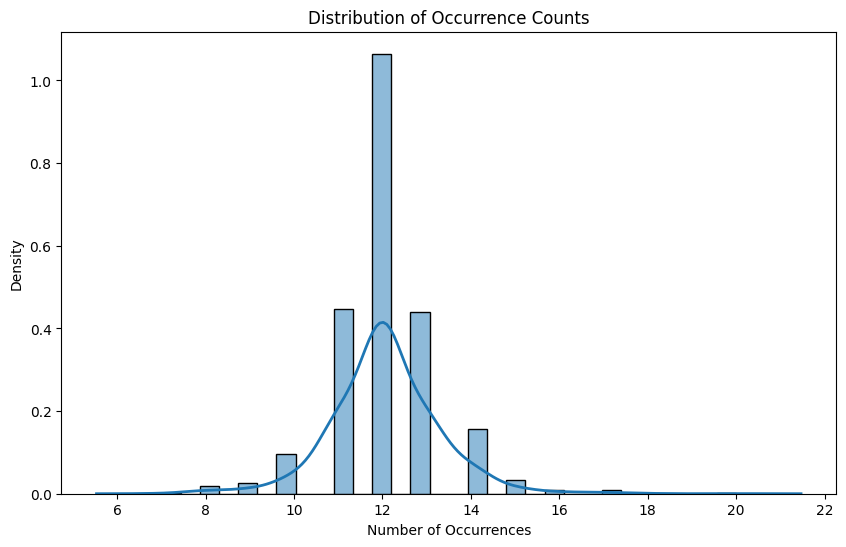

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(counts3, bins=30, stat='density', alpha=0.5, kde=False)
sns.kdeplot(counts3, fill=False, linewidth=2, bw_adjust=2)
plt.xlabel('Number of Occurrences')
plt.ylabel('Density')
plt.title('Distribution of Occurrence Counts')
plt.show()

In [ ]:
print("Summary Statistics of Occurrence Counts:")
print(f"Min occurrences: {counts3.min()}")
print(f"Max occurrences: {counts3.max()}")
print(f"Mean occurrences: {counts3.mean():.2f}")
print(f"Median occurrences: {counts3.median()}")
print(f"Std Dev: {counts3.std():.2f}")
print(f"Total unique values: {len(counts3)}")
print(f"Total data points: {counts3.sum()}")

Summary Statistics of Occurrence Counts:
Min occurrences: 7
Max occurrences: 20
Mean occurrences: 12.06
Median occurrences: 12.0
Std Dev: 1.19
Total unique values: 2731
Total data points: 32941


In [ ]:
anti_mode = counts3.idxmin()
anti_mode_count = counts3.min()
mode = counts3.idxmax()
mode_count = counts3.max()

print(f"Least common word: '{anti_mode}'")
print(f"Appears: {anti_mode_count} times")

print(f"Most common word: '{mode}'")
print(f"Appears: {mode_count} times")

Least common word: 'TYPE2'
Appears: 7 times
Most common word: 'BASKETBALL1'
Appears: 20 times


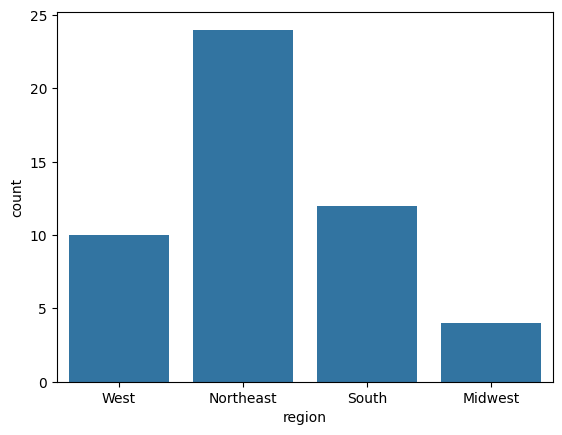

In [ ]:
sns.countplot(data=demographics, x='region')
plt.show()

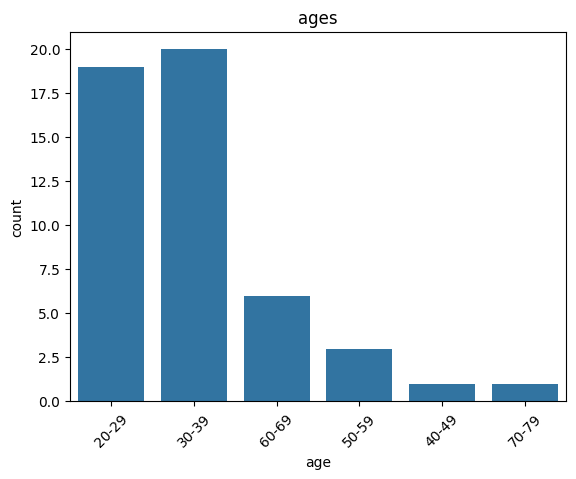

In [ ]:
sns.countplot(data=demographics, x='age')
plt.xticks(rotation=45)
plt.title('ages')
plt.show()

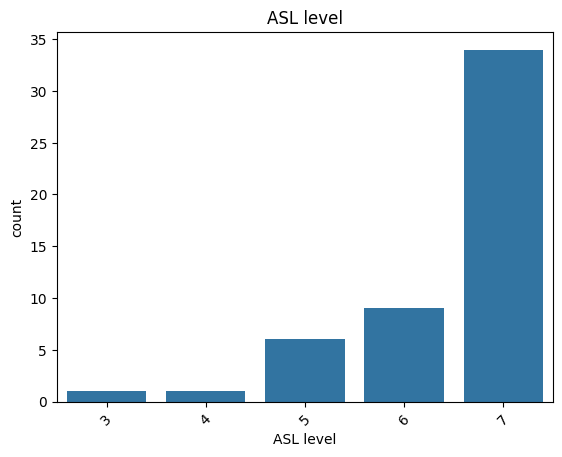

In [ ]:
sns.countplot(data=demographics, x='ASL level')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.title('ASL level')
plt.show()

In [ ]:
proportions = demographics['gender'].value_counts(normalize=True)
print(proportions)

gender
Female    0.627451
Male      0.372549
Name: proportion, dtype: float64


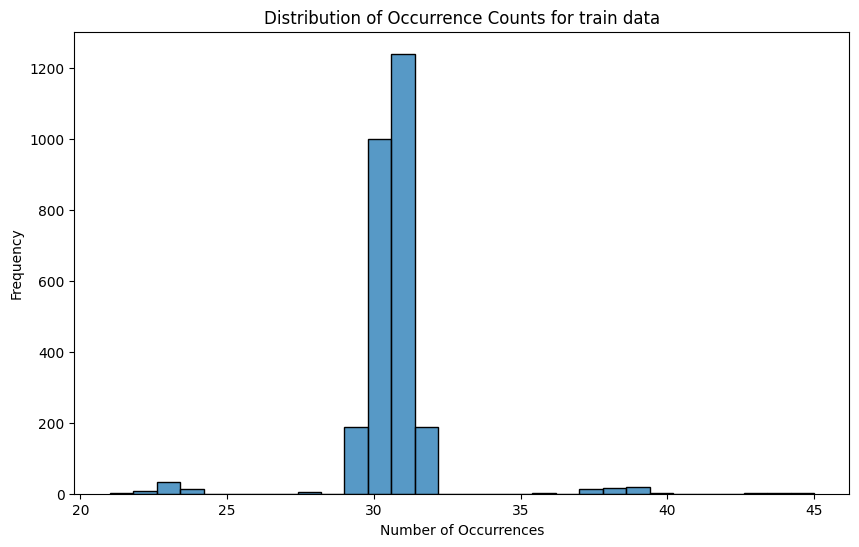

In [ ]:
counts4 = full['Gloss'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(counts4, bins=30, kde=False)
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Occurrence Counts for train data')
plt.show()